Hand-written Digits Image Classification with Softmax

In [2]:
# Import needed libraries

# PyTorch Library
import torch 
# PyTorch Neural Network
import torch.nn as nn
# Allows us to transform data
import torchvision.transforms as transforms
# Allows us to get the digit dataset
import torchvision.datasets as dsets
# Creating graphs
import matplotlib.pylab as plt
# Allows us to use arrays to manipulate and store data
import numpy as np

In [16]:
# A helper function to plot the parameters of the Softmax function

def PlotParameters(model):
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            # Set the label for the sub-plot
            ax.set_xlabel("class: {0}".format(i))
            # Plot the image
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()

In [4]:
# Helper function to visualize the data

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

Make Some Data

In [7]:
# Create and print the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

100%|██████████| 9912422/9912422 [00:01<00:00, 7435173.15it/s] 


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 14441546.71it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

100%|██████████| 1648877/1648877 [00:00<00:00, 32996294.76it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4542329.22it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [8]:
# Create and print the validation dataset

validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())
print("Print the validation dataset:\n ", validation_dataset)

Print the validation dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


First Image and Label


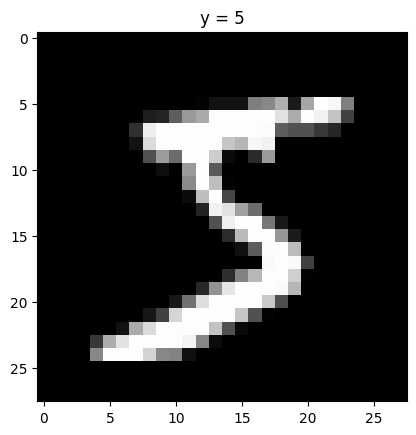

In [9]:
# Check the first image and label in the dataset

print("First Image and Label")
show_data(train_dataset[0])

Build a Softmax Classifer

In [10]:
# Define a softmax classifier class which inherits nn.Module, the base class for all neural networks

class SoftMax(nn.Module):
    # Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        # Creates a layer of given input size and output size
        self.linear = nn.Linear(input_size, output_size)

    # Prediction
    def forward(self, x):
        # Runs the x value through th esingle layers defined above
        z = self.linear(x)
        return z

In [11]:
# Check the shape of the training dataset images

train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [12]:
# Flatten the array, and set input and input and output dimensions
# Output is 10 because there are ten possible digits

input_dim = 28 * 28
output_dim = 10

Define the Softmax Classifier, Criterion Function, Optimizer, and Train the Model

In [13]:
# Create the model

model = SoftMax(input_dim, output_dim)
print("Print the model:\n "), model

Print the model:
 


(None,
 SoftMax(
   (linear): Linear(in_features=784, out_features=10, bias=True)
 ))

In [14]:
# View the size of the model parameters

print("W: ", list(model.parameters())[0].size())
print("b: ", list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


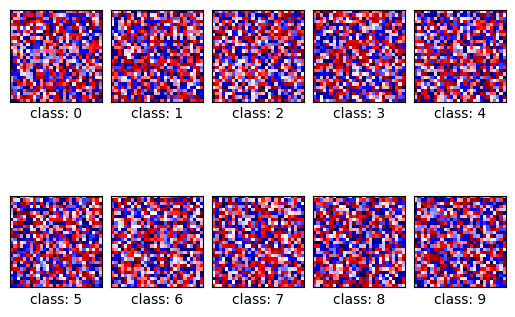

In [17]:
# Plot the model parameters for each class (output)
# Since the model hasn't been trained, the parameters look random

PlotParameters(model)

In [23]:
# Make a prediction

# Set X to the first image
X = train_dataset[0][0]

# Check the shape, then flatten
print(X.shape)
X = X.view(-1, X.shape[1] * X.shape[2])
print(X.shape)

# Make a prediction. The higher the value in each class is the confidence of the prediction
prediction = model(X)
prediction



torch.Size([1, 28, 28])
torch.Size([1, 784])


tensor([[ 0.1558, -0.0874,  0.0889,  0.2704,  0.5111,  0.1311,  0.0389,  0.1259,
          0.3011, -0.2614]], grad_fn=<AddmmBackward0>)

In [24]:
# Define the learning rate, optimizer, criterion, and data loader

learning_rate = 0.1
# The optimizer will update the model parameters using the learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# The criterion will measure the loss between the prediction and the actual label values
# This is where the SoftMax occurs, it is built into the Criterion Cross Entropy Loss
criterion = nn.CrossEntropyLoss()
# Create a training data loader so we can set the batch size
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
# Create a validation data loader so we can set the batch size
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

Getting into how Cross Entropy Loss uses Softmax

output:  tensor([[ 0.1558, -0.0874,  0.0889,  0.2704,  0.5111,  0.1311,  0.0389,  0.1259,
          0.3011, -0.2614]], grad_fn=<AddmmBackward0>)
Actual:  tensor([5])


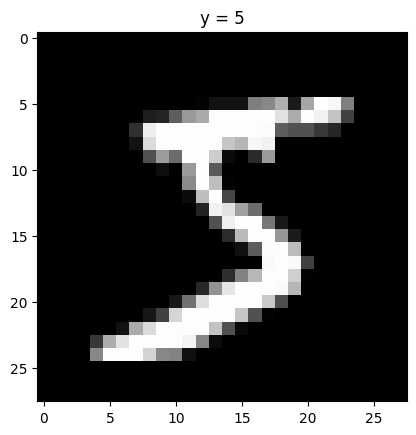

In [25]:
# Look at what the model produces

model_output = model(X)
actual = torch.tensor([train_dataset[0][1]])

show_data(train_dataset[0])
print("output: ", model_output)
print("Actual: ", actual)

In [26]:
# The criterion will take these values and return a loss

criterion(model_output, actual)

tensor(2.3191, grad_fn=<NllLossBackward0>)

In [27]:
# Cross Entropy Loss takes probabilities, but the model output produces relative values.
# Softmax converts the model output to probabilities for use in Cross Entropy Loss

softmax = nn.Softmax(dim=1)
probability = softmax(model_output)
print(probability)

tensor([[0.1008, 0.0791, 0.0943, 0.1131, 0.1438, 0.0984, 0.0897, 0.0978, 0.1166,
         0.0664]], grad_fn=<SoftmaxBackward0>)


In [29]:
# Calculate the negative log of the probability that the image belongs to the actual class
-1*torch.log(probability[0][actual])
# The result will match the criterion output above; we have rebuilt the Cross Entropy Loss calcuation

tensor([2.3191], grad_fn=<MulBackward0>)

Train

In [30]:
# Train the model and determine the validation accuracy

# Number of times we train our model using the training data
n_epochs = 10
# Lists to keep track of loss and accuracy
loss_list = []
accuracy_list = []
# Size of the validation data
N_test = len(validation_dataset)

# Function to train the model based on number of epochs
def train_model(n_epochs):
    # Loops n_epochs times
    for epoch in range(n_epochs):
        # For each batch in the train loader
        for x, y in train_loader:
            # Resets the calculated gradient value, this must be done each time as it accumulates if we do not reset
            optimizer.zero_grad()
            # Makes a prediction based on the image tensor
            z = model(x.view(-1, 28 * 28))
            # Calculates loss between the model output and actual class
            loss = criterion(z, y)
            # Calculates the gradient value with respect to each weight and bias
            loss.backward()
            # Updates the weight and bias according to calculated gradient value
            optimizer.step()
        
        # Each epoch we check how the model performs with data it has not seen which is the validation data, we are not training here
        correct = 0
        # For each batch in the validation loader
        for x_test, y_test in validation_loader:
            # Makes prediction based on image tensor
            z = model(x_test.view(-1, 28 * 28))
            # Finds the class with the higest output
            _, yhat = torch.max(z.data, 1)
            # Checks if the prediction matches the actual class and increments correct if it does
            correct += (yhat == y_test).sum().item()
        # Calculates the accuracy by dividing correct by size of validation dataset
        accuracy = correct / N_test
        # Keeps track loss
        loss_list.append(loss.data)
        # Keeps track of the accuracy
        accuracy_list.append(accuracy)

# Function call
train_model(n_epochs)

Analyze Results

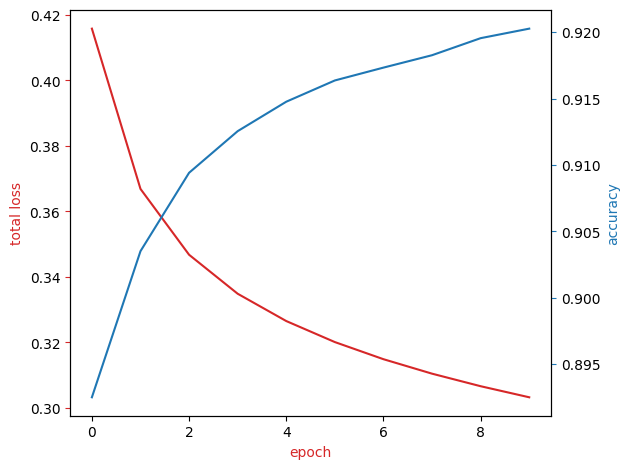

In [31]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

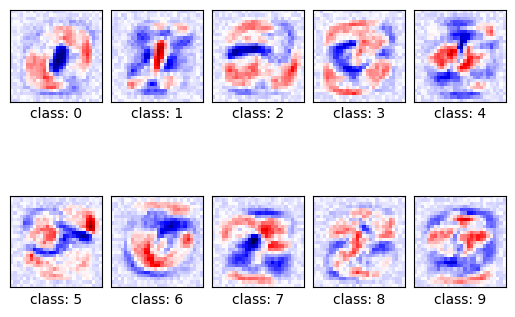

In [32]:
# Plot the parameters after training

PlotParameters(model)

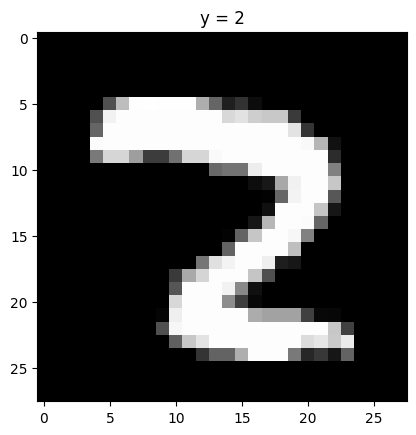

yhat: tensor([7])
probability of class  0.6799416542053223


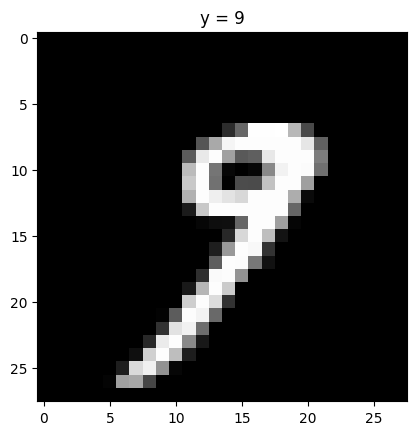

yhat: tensor([7])
probability of class  0.7104579210281372


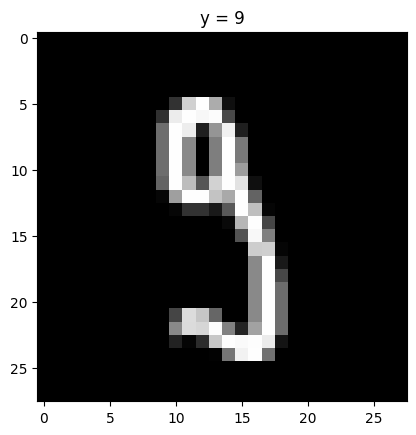

yhat: tensor([5])
probability of class  0.7266638875007629


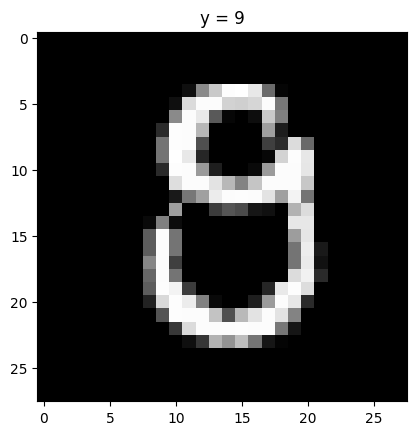

yhat: tensor([8])
probability of class  0.3774457573890686


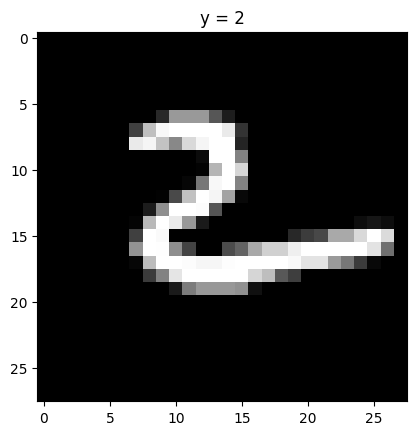

yhat: tensor([6])
probability of class  0.5134424567222595


In [33]:
# Plot the first five misclassified samples, and the probability (confidence) of the classification

Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break       

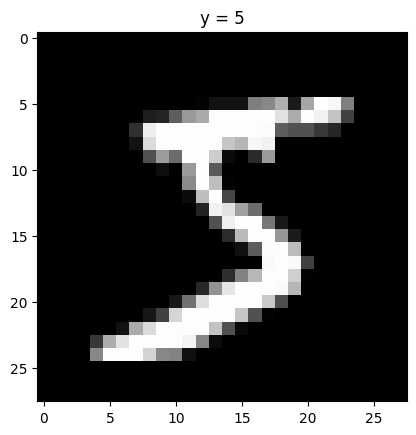

yhat: tensor([5])
probability of class  0.8523470759391785


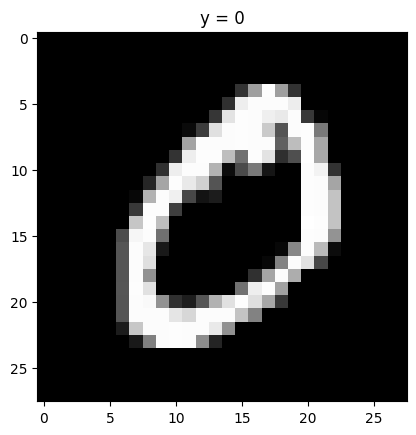

yhat: tensor([0])
probability of class  0.9997039437294006


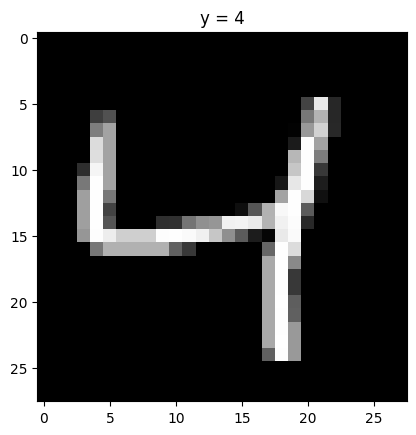

yhat: tensor([4])
probability of class  0.887158989906311


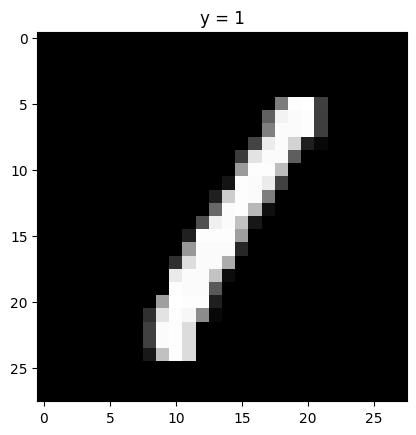

yhat: tensor([1])
probability of class  0.9665207862854004


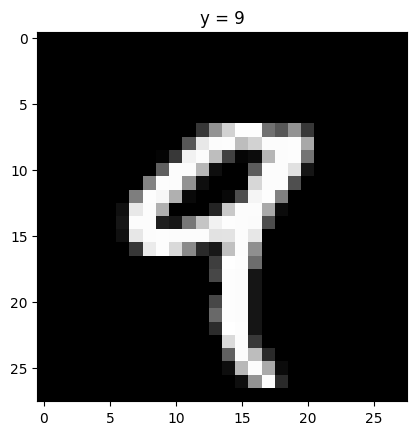

yhat: tensor([9])
probability of class  0.9213578701019287


In [34]:
# Plot the first five correctly classified samples, and the probability (confidence) of the classification
# These values will be much higher than the misclassified numbers
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break       